In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Reproduce Watsons's K-means result

In [3]:
#read in datatable into pandas dataframe
w12_df = pd.read_table("w12-data.tbl.txt", delim_whitespace = True)

In [4]:
#convert data into log counts
w12_df = np.log(w12_df)

In [6]:
def multi_dim_k(dataframe, clusters, X_rep):
    '''
    K-means clustering for a multidimensional dataset. 
    
    Parameters
    ----------
    dataframe: pandas dataframe
        cell x gene dataframe of scRNA-seq data
    
    clusters: int
        number of clusters you want to use
        
    X_rep: int
        number of iterations to run the K-means clustering algorithm
        
    Returns
    -------
    final_tot_dist: float
        minimized distance between k-mean and data point
    
    final_assign: list
        assignments of each gene to a cluster
    
    final_data_centroids: pandas dataframe
        dataframe of genes and their values for each centroid (should have as many rows as clusters)

    '''
    
    
    #make v.large to start with!!
    final_tot_dist = 100000000000000

    for x in range(X_rep):
        #initialize distances
        tot_dist = 0
        old_tot_dist = 1
        #randomly sample datapoints from the dataframe to intialize centroids
        centroids =  dataframe.sample(clusters)

        while tot_dist != old_tot_dist:
            #assignment step for assigning each data point to a centroid
            assign = []

            old_tot_dist = tot_dist
            tot_dist = 0

            for j in range(len(dataframe)):
                dist = []
                for i in range(len(centroids)):
                    dist.append(np.linalg.norm(centroids.iloc[i] - dataframe.iloc[j]))
                assign.append(np.argmin(dist))
                tot_dist += min(dist)

            #update step (update centroids as the average of the cluster points)
            #get all points that are assigned to each cluster
            #for each centroid - get all points that are associated with the cluster
            for i in range(len(centroids)):
                if i in assign:
                    centroids.iloc[i] = np.mean(np.array(dataframe)[np.where(np.array(assign) == i)], axis=0)

        if tot_dist < final_tot_dist:
            final_tot_dist = tot_dist
            final_assign = assign
            final_data_centroids = centroids
        
        #view convergence
        print(tot_dist)
    
    return final_tot_dist, final_assign, final_data_centroids

Running the K-means clustering algorithm for at least 20 iterations (X-rep) for 8 clusters to see if I can reproduce Watson's result. 

In [7]:
final_tot_dist_20, final_assign_20, final_data_centroid_20 = multi_dim_k(w12_df, 8, 20)

4182.623548324859
4183.80431883382
4206.799513366735
4181.684931645738
4188.675799367659
4183.570902687896
4192.118706742282
4181.133407486728
4191.448595217149
4187.754775202326
4184.125537295576
4189.577286591523
4196.215388834981
4188.85092550306
4204.078421309508
4181.165592067176
4191.14874831179
4185.632016410519
4180.610800685562
4195.576384571471


In [8]:
print("Lowest total distance:", final_tot_dist_20)

Lowest total distance: 4180.610800685562


As you can see, the lowest total distance of the K-means algorithm using the log counts of the gene expression is very close to Watson's result of 4159.9. 

## 2. Reduce the dimensionality 

In [5]:
#create centered data matrix (n x p = cell x gene)
#need to take the mean of each column and subtract the value in each column from that mean
c_w12 = w12_df - w12_df.mean(axis=0)

In [6]:
c_w12

,arugula,blueberry,cabbage,chickpea,clementine,cranberry,honeydew,mulberry,mustard,onion,...,H2BFS,PDXK,C21orf33,PFKL,KRTAP10-8,SLC19A1,SLC19A1.1,AC136352.2,AC136352.2.1,AL592183.1
0,0.119898,-0.621511,0.084508,-0.696855,-0.385282,-0.009428,-0.018674,-0.564282,0.155548,-0.625124,...,-0.936919,-0.376898,0.204285,-0.809872,-0.242750,0.181383,-0.339832,0.208958,0.132983,-0.132988
1,0.813045,0.154835,-0.022524,-0.077227,-0.644919,0.381438,0.369452,0.709618,0.104996,-0.148407,...,-0.015988,-0.083911,0.638376,-0.660527,0.433180,0.546482,-0.239188,0.334121,-0.599986,-0.334099
2,0.119898,0.420748,0.604689,-0.674127,0.343074,-0.652469,0.456780,-0.219831,0.119702,0.501049,...,-0.063390,0.215606,0.003614,-0.189801,-0.316530,0.337696,-0.086558,1.216354,0.242838,-0.204814
3,-0.654102,0.326243,0.753879,-0.225894,-0.866957,-0.311709,-0.869340,0.709618,-0.246402,0.065025,...,-0.421453,-0.219712,0.356811,0.221663,0.126505,-0.370686,-0.260694,0.391279,0.960787,-0.604974
4,0.289190,0.264179,0.032423,0.043073,0.220544,0.430992,0.000205,0.183425,0.896815,0.432749,...,0.153911,-0.589459,0.477660,0.182634,0.338376,-0.830218,0.418773,-0.115282,0.653967,-0.307813
5,-0.789138,0.616135,0.084508,0.629233,0.316362,0.109671,0.252619,0.342619,0.575000,-0.322583,...,0.460936,0.332081,-0.609491,-0.556323,-0.686640,0.409564,0.183852,0.301934,-0.228422,0.220315
6,-0.009482,0.264179,0.292500,-0.186030,-0.032368,-0.957850,-0.085906,0.411864,0.090070,0.137415,...,-0.015988,-0.000212,-0.631090,-1.034695,-0.083937,-0.366309,0.247955,-1.192841,0.003875,-0.018953
7,0.255853,0.198007,-0.254599,0.030193,-0.032368,-0.074758,-0.057536,0.218211,-0.405830,0.273039,...,0.161693,-0.477541,0.751924,-0.137064,0.560087,-0.174210,-0.548376,-0.363562,0.203510,-0.383737
8,-0.403958,-0.274011,0.258335,0.276764,0.450739,0.193754,-0.466503,-0.836507,0.353013,-0.000115,...,0.615087,0.116760,0.571135,-0.886564,-0.431637,-0.959789,0.122792,-0.510165,-0.128681,0.124030
9,0.379270,0.446187,0.206460,0.604515,0.294119,0.133936,-0.253942,-0.095447,0.370205,-0.410399,...,0.370785,-1.231313,0.204285,0.940786,-0.353976,-0.323568,0.111619,-1.192841,-0.879369,0.442623


In [15]:
#apply singlular value decomposition to the centered data matrix where:
#U = n x r matrix (cell by rank; rank = dimensionality of the space spanned by the data matrix X)
#S = r x r matrix
#Wt = r x p matrix (rank by gene) - the transpose of the eigenvectors
U, S, Wt = np.linalg.svd(c_w12)

In [16]:
S

array([6.43244443e+01, 4.38012408e+01, 2.77300696e+01, 2.76626311e+01,
       2.74954221e+01, 2.72956864e+01, 2.72735967e+01, 2.70555543e+01,
       2.69696277e+01, 2.68626853e+01, 2.66204795e+01, 2.65793318e+01,
       2.64381107e+01, 2.63905102e+01, 2.63061708e+01, 2.62247088e+01,
       2.61557462e+01, 2.61210625e+01, 2.59873795e+01, 2.59007452e+01,
       2.58570182e+01, 2.57857056e+01, 2.56941524e+01, 2.55633613e+01,
       2.53930976e+01, 2.53623844e+01, 2.52913338e+01, 2.52210184e+01,
       2.52063135e+01, 2.50530876e+01, 2.50167465e+01, 2.49570285e+01,
       2.49148935e+01, 2.47819499e+01, 2.47581567e+01, 2.47314172e+01,
       2.46595094e+01, 2.45900246e+01, 2.45055939e+01, 2.44499952e+01,
       2.43590792e+01, 2.42336414e+01, 2.41804085e+01, 2.41306066e+01,
       2.40717044e+01, 2.40284126e+01, 2.39589217e+01, 2.38898105e+01,
       2.38527645e+01, 2.37654081e+01, 2.37036165e+01, 2.36792450e+01,
       2.36291738e+01, 2.35223513e+01, 2.34791014e+01, 2.34296855e+01,
      

In [9]:
#calculate eigenvalues using the S matrix and the centered data matrix
eigenvalues = np.divide(np.power(S, 2), len(c_w12)-1)

In [10]:
#Transpose the rank by gene matrix to get the eigenvector matrix
W = Wt.T
#get principle components by multiplying the centered data matrix by the first (PC1) and second (PC2) eigenvectors
PC1 = c_w12 @ W[:,0]
PC2 = c_w12 @ W[:,1]

Text(0.5,1,'PC1 v. PC2')

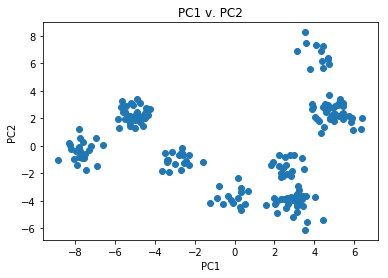

In [11]:
#Plot PC1 v. PC2 for low-dimensional visualization
plt.scatter(PC1, PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 v. PC2')

Looks like Watson was right - got 8 clusters here.

In [12]:
#take a look at the eigenvalues themselves. 
eigenvalues

array([2.07921313e+01, 9.64094821e+00, 3.86410433e+00, 3.84533247e+00,
       3.79898611e+00, 3.74399245e+00, 3.73793507e+00, 3.67840714e+00,
       3.65507948e+00, 3.62615007e+00, 3.56105493e+00, 3.55005467e+00,
       3.51243065e+00, 3.49979411e+00, 3.47746041e+00, 3.45595655e+00,
       3.43780432e+00, 3.42869299e+00, 3.39368792e+00, 3.37109850e+00,
       3.35972559e+00, 3.34121915e+00, 3.31753501e+00, 3.28384644e+00,
       3.24024827e+00, 3.23241478e+00, 3.21432946e+00, 3.19648125e+00,
       3.19275497e+00, 3.15405628e+00, 3.14491258e+00, 3.12991594e+00,
       3.11935637e+00, 3.08615599e+00, 3.08023278e+00, 3.07358291e+00,
       3.05573570e+00, 3.03853923e+00, 3.01770921e+00, 3.00403149e+00,
       2.98173236e+00, 2.95110240e+00, 2.93815153e+00, 2.92606118e+00,
       2.91179372e+00, 2.90132970e+00, 2.88457252e+00, 2.86795500e+00,
       2.85906721e+00, 2.83816392e+00, 2.82342430e+00, 2.81762133e+00,
       2.80571787e+00, 2.78040708e+00, 2.77019198e+00, 2.75854353e+00,
      

The first two PCs look like they capture most of the variance of the data, so probably using any other PCs wouldn't really change the number of clusters we see the data cluster into. As a check, I'll compare these eigenvalues to the negative control set that we have to play with. 

In [13]:
#read in the negative control set
eigenvalue_negs = pd.read_table("w12-eigen.tbl.txt", delim_whitespace=True, header=None)

In [14]:
#change eigenvalue_negs dataframe to an array
eigenvalue_negs = np.array(eigenvalue_negs[1])

Text(0.5,1,'Data compared to negative control set')

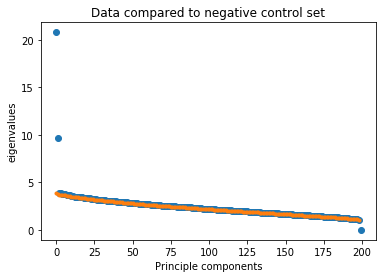

In [15]:
#plot the actual eigenvalues and compare to the negative control set
plt.plot(range(len(eigenvalues)), eigenvalues, "o") #in blue
plt.plot(range(len(eigenvalue_negs)), eigenvalue_negs, ".") #in orange
plt.xlabel('Principle components')
plt.ylabel('eigenvalues')
plt.title('Data compared to negative control set')

As you can see, the negative control set doesn't overlap with the first two PCs and seems to overlap with the rest, so probably the vast majority of what isn't included in PC1 and PC2 is noise. So, even if we included more PCs, it wouldn't change our results except to introduce more noise, and we can be confident now that there really are 8 clusters. 

Text(0.5,1,'Eigenvector loadings')

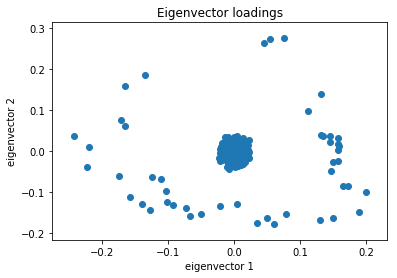

In [16]:
#plot eigenvector loadings
plt.scatter(W[:,0], W[:,1])
plt.xlabel('eigenvector 1')
plt.ylabel('eigenvector 2')
plt.title('Eigenvector loadings')

Those points which are not clustered on zero are the influencing genes. 

In [17]:
#for each dimension calculate distance from the origin
og_dist = np.linalg.norm(W[:,:2], axis=1)

Text(0.5,1,'Threshold determination for cutoff')

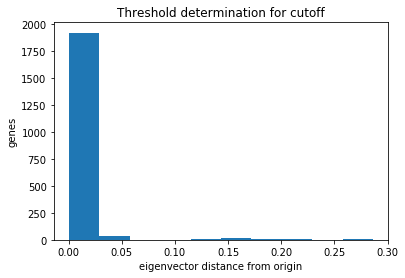

In [18]:
#plot distances to determine a cutoff threshold, looks like 0.1 is a good cutoff
plt.hist(og_dist)
plt.xlabel('eigenvector distance from origin')
plt.ylabel('genes')
plt.title('Threshold determination for cutoff')

In [19]:
#get indices where the distance is greater than 0.1, so we can see which are the influential genes
genes_inf = []
for i, j in enumerate(og_dist):
    #get indices of genes so that I can later ask which genes they are
    if j >= 0.1:
        genes_inf.append(i)

In [20]:
#number of influential genes that influence cell type identity
print("Number of genes influencing cell type identity:", len(genes_inf), "genes")

Number of genes influencing cell type identity: 47 genes


## 3. Check the K 

Text(0.5,1,'PCs plotted with centroid assignment by K-means clustering in 2001 dimensions')

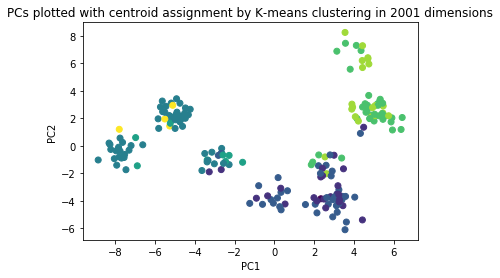

In [21]:
#plot centered values from PC subspace using the clustering assignment based on k-means clustering using
#gene expression values in 2001 dimensions
plt.scatter(PC1, PC2, c=final_assign_20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCs plotted with centroid assignment by K-means clustering in 2001 dimensions')

K-means looks like its not working so well when you use gene expression values as input, let's try using the PC values instead because this is probably due to the fact that the gene expression data has too many dimensions, which includes a lot of noise! So if we use PC space, instead of gene expression space, with the first two PCs (i.e. the non-noisy data), we can actually cluster properly. 

In [22]:
#put the first two PCs together into one dataframe
PC_df = pd.DataFrame(np.array([PC1, PC2]).T, columns =['PC1', 'PC2'])

In [23]:
#run k-means algorithm on the PC data
PC_2_tot_dist_20, PC_2_final_assign_20, PC_2_centroids = multi_dim_k(PC_df, 8, 20)

217.7711801286566
142.4279009726578
172.8681904845787
142.4279009726578
170.48047598844067
196.70561452987982
171.0252891272148
142.4279009726578
200.04693228270074
142.4279009726578
198.8053000070614
205.9214145797064
184.3041178561187
291.70887975769716
142.4279009726578
175.0680285095024
171.0286608890354
234.58932571198164
171.3547244186697
238.6983532091542


Text(0.5,1,'PCs plotted with centroid assignment by K-means clustering in PC1 and PC2 dimensions')

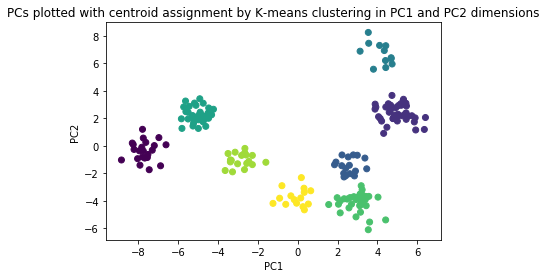

In [24]:
#plot centered values from PC subspace using the clustering assignment based on k-means clustering using first two PCs
plt.scatter(PC1, PC2, c=PC_2_final_assign_20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCs plotted with centroid assignment by K-means clustering in PC1 and PC2 dimensions')

Yes! Clustering works much better in PC space. 

## 4. Reconstruct the expression patterns 

In [25]:
#generate reconstructed data (de-noised data)
X_recon = U[:,:2] @ np.diag(S[:2]) @ Wt[:2,:]

Text(0.5,1,'Reconstructed data')

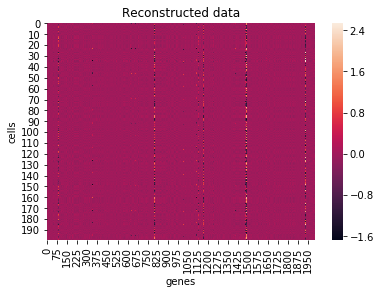

In [26]:
sns.heatmap(X_recon)
plt.xlabel('genes')
plt.ylabel('cells')
plt.title('Reconstructed data')

Need to remove all of the genes that aren't influential...(i.e. remove noisy genes)

In [27]:
#make a subset of data to include only the influential genes found in part 2.
X_recon_inf = X_recon[:,genes_inf]

Text(0.5,1,'Reconstructed data')

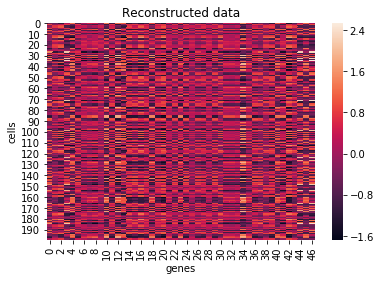

In [28]:
sns.heatmap(X_recon_inf)
plt.xlabel('genes')
plt.ylabel('cells')
plt.title('Reconstructed data')

This is better, but it's difficult to see the clusters, so I'll sort them based on their clusters and then plot the heatmap.

In [29]:
clust_list = []
for i in range(8):
    for j, k in enumerate(PC_2_final_assign_20):
        if k == i:
            clust_list.append(X_recon_inf[j])

Text(0.5,1,'Reconstructed data')

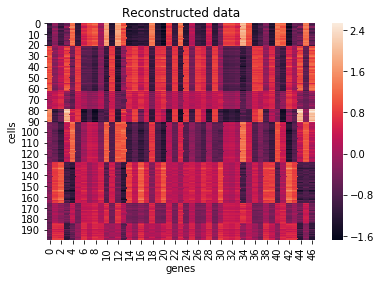

In [30]:
sns.heatmap(clust_list)
plt.xlabel('genes')
plt.ylabel('cells')
plt.title('Reconstructed data')

Looks like there are 8 clusters here from the reconstructed data!